## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[333]

8

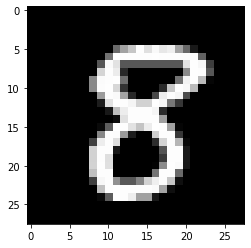

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [9]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [34]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [35]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [37]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.8351 - accuracy: 0.7405 - val_loss: 0.2168 - val_accuracy: 0.9364
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2733 - accuracy: 0.9199 - val_loss: 0.1533 - val_accuracy: 0.9541
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2074 - accuracy: 0.9383 - val_loss: 0.1308 - val_accuracy: 0.9586
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1792 - accuracy: 0.9483 - val_loss: 0.1140 - val_accuracy: 0.9647
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1599 - accuracy: 0.9526 - val_loss: 0.1105 - val_accuracy: 0.9659
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1454 - accuracy: 0.9571 - val_loss: 0.1032 - val_accuracy: 0.9698
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1359 - accuracy: 0.9598 - val_loss: 0.0972 - val_accuracy: 0.9700
Epoch 

In [31]:
## We will use Keras to evaluate function to evaluate performance on the test set

score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.14077624678611755
Test accuracy: 0.9745000004768372


In [38]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

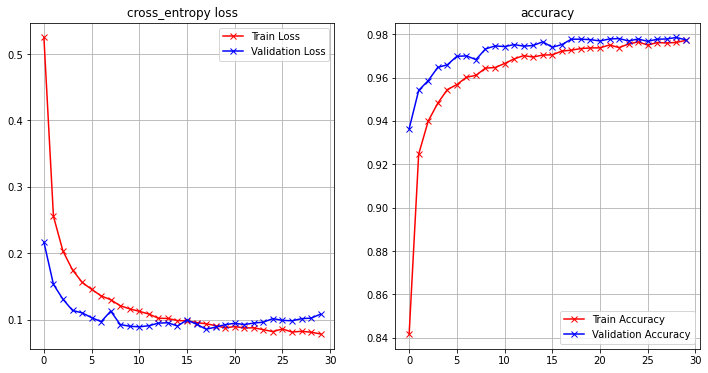

In [39]:
plot_loss_accuracy(history_1)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [50]:
### Build your model here

model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(38, activation='relu'))
model_2.add(Dropout(0.4)) 
model_2.add(Dense(10, activation='softmax'))

In [41]:
# Let's compile the model
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.2595 - accuracy: 0.5867 - val_loss: 0.2897 - val_accuracy: 0.9210
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5073 - accuracy: 0.8518 - val_loss: 0.2284 - val_accuracy: 0.9307
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4175 - accuracy: 0.8829 - val_loss: 0.2058 - val_accuracy: 0.9390
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3743 - accuracy: 0.8948 - val_loss: 0.1817 - val_accuracy: 0.9459
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3484 - accuracy: 0.9034 - val_loss: 0.1746 - val_accuracy: 0.9506
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3295 - accuracy: 0.9089 - val_loss: 0.1699 - val_accuracy: 0.9535
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3172 - accuracy: 0.9137 - val_loss: 0.1630 - val_accuracy: 0.9563
Epoch 

In [42]:
## We will use Keras to evaluate function to evaluate performance on the test set

score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.15374673902988434
Test accuracy: 0.9613000154495239


COMPARAÇÃO DOS MODELOS
_________________________________________________________


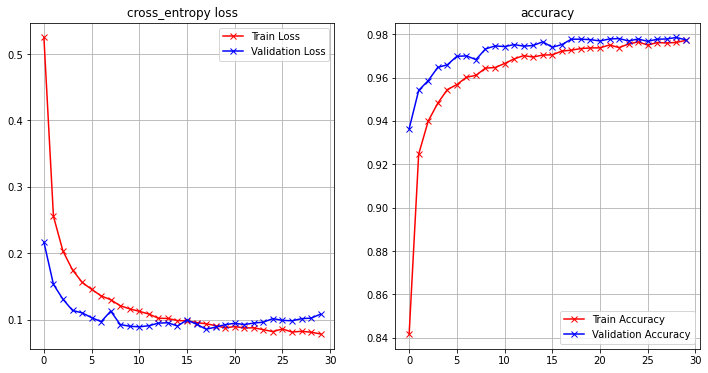

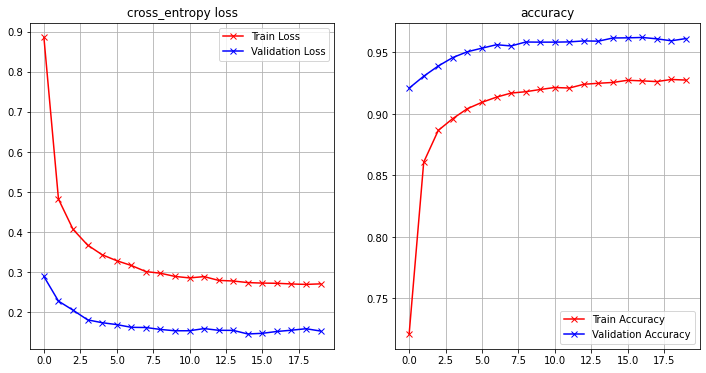

In [47]:
print("COMPARAÇÃO DOS MODELOS")
plot_loss_accuracy(history_1)
print("_________________________________________________________")
plot_loss_accuracy(history_2)

In [48]:
print("COMPARAÇÃO DOS MODELOS")
print('First Test loss: {}  x  Second Test loss {}', score_1[0], score_2[0])
print('First Test accuracy: {}  x  Second Test Accuracy', score_1[1], score_2[1])

COMPARAÇÃO DOS MODELOS
First Test loss: {}  x  Second Test loss {} 0.14077624678611755 0.15374673902988434
First Test accuracy: {}  x  Second Test Accuracy 0.9745000004768372 0.9613000154495239


#### How many parameters does your model have?  


#### How does it compare with the previous model?

## Think about the following questions

**1) How do model_1 and model_2 compare? Which do you prefer? If you were going to put one into production, which would you choose and why?**  
As variações se deram da seguinte forma:  
Aumento do dropout no segundo modelo.  
Diminuição do número de épocas.  
Diminuição do tamanho da rede neural.  

O melhor modelo é aquele que possue uma boa performance durante o treinamento, ou seja, leva menos tempo para se ajustar, e que também possua um balanceamento entre loss e accuracy, isso significa ter um baixo loss e alto accuracy. Para que seja colocado em produção, deve se escolher aquele modelo que tem melhor capacidade de generalização mantendo uma boa accuracy, o modelo que melhor apresenta essas carácteristicas é o primeiro, o segundo modelo possui um training loss maior que o validation loss isso pode ser carcterizado como underfitting. 

**2) Compare the trajectories of the loss function on the training set and test set for each model? How do they compare? What does that suggest about each model? Do the same for accuracy? Which do you think is more meaningful, the loss or the accuracy?**  
Primeiro modelo: validation loss ~ training loss  
Segundo modelo: validation loss << training loss  

O primeiro modelo teve bom ajuste, enquanto nos segundo possivelmente houve um underfitting, da mesma forma a acurácia do segundo modelo descresceu por esse mesmo motivo.  

A métrica que tem melhor indicativo é o **loss**.  


**3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model. Try it out below? Did it improve the performance?**  
O primeiro modelo não precisa de mudanças pois teve um bom ajuste.  
O segundo modelo necessita de uma melhor fase de treinamento, portanto o dropout deve ser diminuido pois um dropout muito alto(0.4) pode prejudicar o trieno, além disso a rede está muito pequena quando comparado ao numero de features do sistema, assim deve se aumentar também o tamanho da rede, isso significa ou aumentar quantidade de hidden layers ou aumentar o numero de nós de cada layer. Outro fator que pode ajudar é aumentar o número de épocas para dar mais tempo de aprendizado a RNA.  
Portanto irei fazer as modificações mencionadas e criar um novo modelo, sua estrutura e resultados se encontram abaixo.  

In [70]:
# NOVA CONFIGURAÇÃO

### Build your model here

model_3 = Sequential()
model_3.add(Dense(56, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.3))
model_3.add(Dense(56, activation='relu'))
model_3.add(Dropout(0.3)) 
model_3.add(Dense(10, activation='softmax'))

In [71]:
# Let's compile the model
learning_rate = .001
model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 25
history_3 = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 1.0069 - accuracy: 0.6819 - val_loss: 0.2392 - val_accuracy: 0.9286
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3577 - accuracy: 0.8976 - val_loss: 0.1985 - val_accuracy: 0.9419
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2928 - accuracy: 0.9163 - val_loss: 0.1634 - val_accuracy: 0.9500
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2517 - accuracy: 0.9274 - val_loss: 0.1503 - val_accuracy: 0.9577
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2265 - accuracy: 0.9348 - val_loss: 0.1372 - val_accuracy: 0.9621
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.2168 - accuracy: 0.9373 - val_loss: 0.1392 - val_accuracy: 0.9622
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.2017 - accuracy: 0.9431 - val_loss: 0.1317 - val_accuracy: 0.9630
Epoch 

In [72]:
## We will use Keras to evaluate function to evaluate performance on the test set

score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

Test loss: 0.12907595932483673
Test accuracy: 0.9718000292778015


COMPARAÇÃO DOS MODELOS
_________________________________________________________
_________________________________________________________


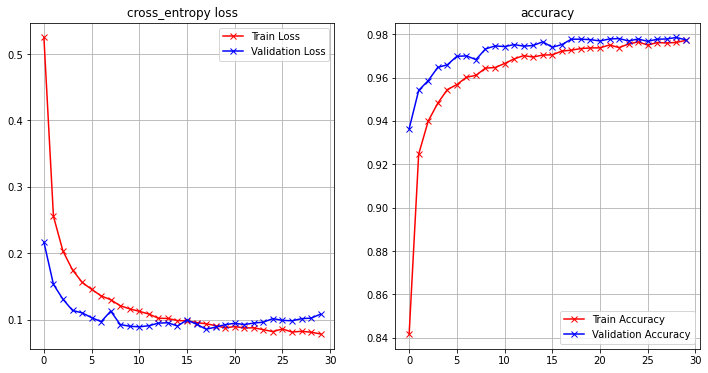

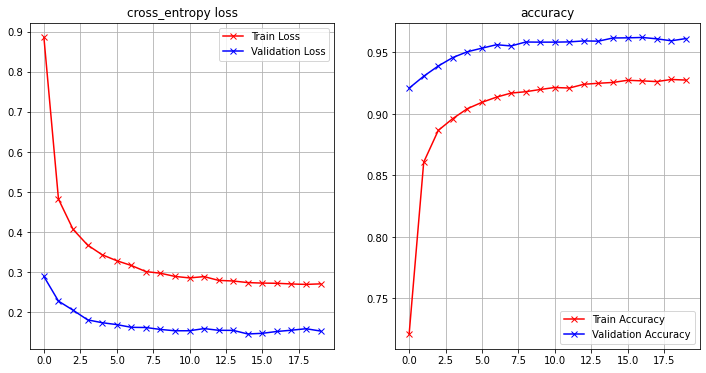

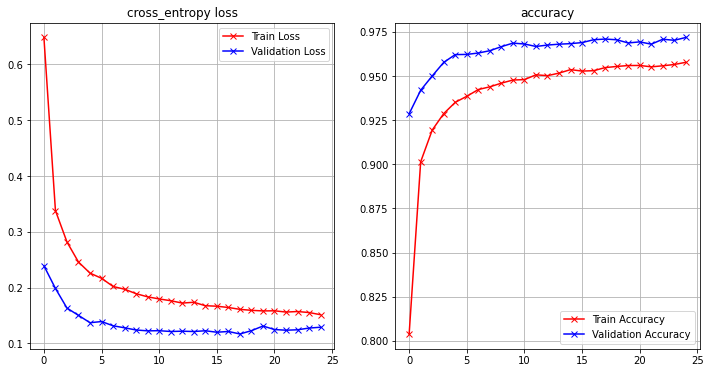

In [73]:
print("COMPARAÇÃO DOS MODELOS")
plot_loss_accuracy(history_1)
print("_________________________________________________________")
plot_loss_accuracy(history_2)
print("_________________________________________________________")
plot_loss_accuracy(history_3)

In [75]:
from tabulate import tabulate

print(tabulate(
    [['model_1', score_1[0], score_1[1]], 
    ['model_2', score_2[0], score_2[1]], 
    ['meu_modelo_3', score_3[0], score_3[1]]], 
    headers=['Modelo', 'loss', 'accuracy']))

Modelo            loss    accuracy
------------  --------  ----------
model_1       0.140776      0.9745
model_2       0.153747      0.9613
meu_modelo_3  0.129076      0.9718
